In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy
import cv2 as cv

import h5py
import pickle
import os
import glob

# auto reload modules 
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Users/sebas/git')

import icewave.tools.datafolders as df
import icewave.tools.matlab2python as mat2py
import icewave.tools.matlab_colormaps as matcmaps
import icewave.sebastien.set_graphs as set_graphs
import icewave.tools.Fourier_tools as FT
import icewave.drone.drone_projection as dp
import icewave.tools.rw_data as rw

# PARULA COLORMAP 
parula_map = matcmaps.parula()

full_blues = mpl.colormaps['Blues'].resampled(256)
new_blues = colors.ListedColormap(full_blues(np.linspace(0.2,1,256)))

plt.rc('text', usetex=True)
plt.rc('font', family='serif', serif='Computer Modern')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load data

In [2]:
base = 'F:/Rimouski_2025/Data/'
date = '0214'
drone_ID = 'mesange'
exp_ID = '05-waves_003'

fig_folder = f'{base}{date}/Drones/{drone_ID}/matData/{exp_ID}/Figures/'
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)


In [3]:
path2data = f'{base}{date}/Drones/{drone_ID}/matData/{exp_ID}/'
filelist = glob.glob(f'{path2data}*scaled.mat')
print(filelist)

idx_file = 0
file2load = filelist[idx_file]

# load file 
with h5py.File(file2load, 'r') as fmat:
    S = {}

    print('Top-level keys : ', list(fmat.keys()))

    S = mat2py.mat_to_dict(fmat['m'],fmat['m'])
    S = mat2py.transpose_PIVmat_fields(S)

['F:/Rimouski_2025/Data/0214/Drones/mesange/matData/05-waves_003\\PIV_processed_i01050_N0_Dt4_b1_W32_xROI1_width3839_yROI1_height2159_scaled.mat']
Top-level keys :  ['#refs#', '#subsystem#', 'm']


In [15]:
S.keys()

dict_keys(['DRONE', 'GPS', 'ID', 'PIV_param', 'PIXEL', 'SCALE', 'UTC_t', 'Vx', 'Vy', 'Vz', 'X', 'Y', 'name', 't', 't0_UTC', 'units', 'x', 'xref', 'y', 'yref'])

### Flip velocity fields

In [96]:
# Vx = FT.supress_quadratic_noise(np.transpose(S['Vx'],(1,0,2)),S['x'],S['y'])
# Vy = FT.supress_quadratic_noise(np.transpose(S['Vy'],(1,0,2)),S['x'],S['y'])
# Vx = np.transpose(Vx,(1,0,2))
# Vy = np.transpose(Vy,(1,0,2))
Vx = np.flip(S['Vx'],0)
Vy = np.flip(S['Vy'],0)

### Show apparent fields $V_x$ and $V_y$

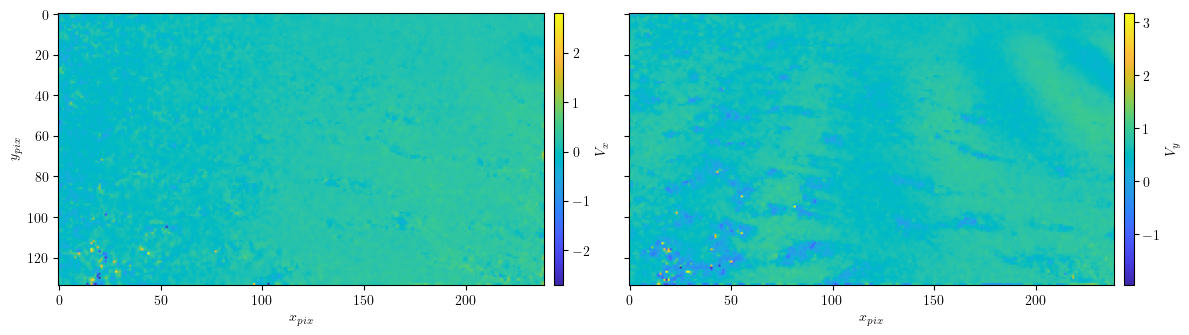

In [98]:
extents_pix = np.array([S['PIXEL']['x_pix'].min(),S['PIXEL']['x_pix'].max(),
                    S['PIXEL']['y_pix'].min(),S['PIXEL']['y_pix'].max()])

frame = 3600

fig, axs = plt.subplots(ncols = 2,sharey = True,figsize = (12,8))
imsh = []
for i,ax in enumerate(axs):
    if i == 0:
        imsh.append(ax.imshow(Vx[:,:,frame].T,cmap = parula_map))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        cbar = plt.colorbar(imsh[i],cax = cax)
        cbar.set_label(r'$V_x$')
    else:
        imsh.append(ax.imshow(Vy[:,:,frame].T,cmap = parula_map))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        cbar = plt.colorbar(imsh[i],cax = cax)
        cbar.set_label(r'$V_y$')
   
    ax.set_xlabel(r'$x_{pix}$')     

axs[0].set_ylabel(r'$y_{pix}$')

plt.tight_layout()

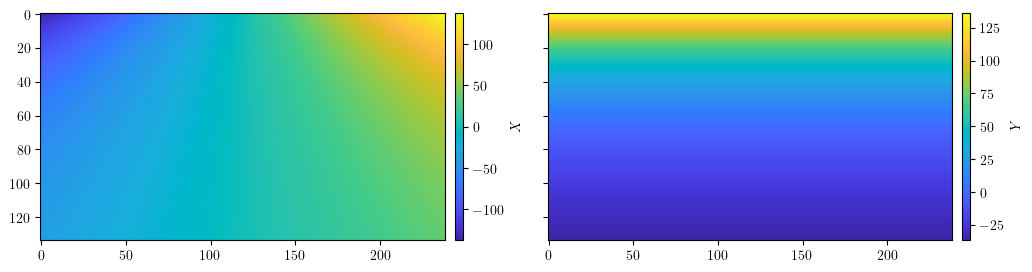

In [10]:
cmap = parula_map
fig, axs = plt.subplots(ncols = 2,sharey = True,figsize = (12,8))
imsh = []
for i,ax in enumerate(axs):
    if i == 0:
        imsh.append(ax.imshow(S['X'].T,cmap = cmap))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        cbar = plt.colorbar(imsh[i],cax = cax)
        cbar.set_label(r'$X$')
    else:
        imsh.append(ax.imshow(S['Y'].T,cmap = cmap))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        cbar = plt.colorbar(imsh[i],cax = cax)
        cbar.set_label(r'$Y$')


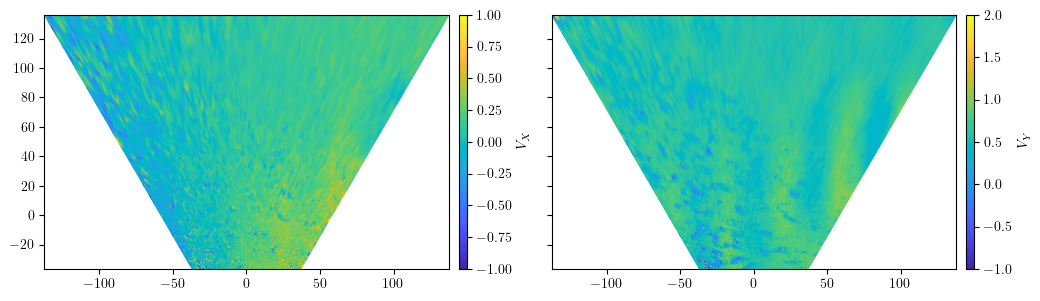

In [99]:
cmap = parula_map
frame = 3600

# axes limits
X_bounds = np.array([-50,50])
Y_bounds = np.array([-40,40])
Vx_values = np.array([-1,1])
Vy_values = np.array([-1,2])

fig, axs = plt.subplots(ncols = 2,sharey = True,figsize = (12,8))
imsh = []
for i,ax in enumerate(axs):
    if i == 0:
        imsh.append(ax.pcolormesh(S['X'],S['Y'],Vx[:,:,frame],shading = 'gouraud',cmap = cmap,
                                 vmin = Vx_values[0],vmax = Vx_values[1]))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        cbar = plt.colorbar(imsh[i],cax = cax)
        cbar.set_label(r'$V_X$')
    else:
        imsh.append(ax.pcolormesh(S['X'],S['Y'],Vy[:,:,frame],shading = 'gouraud',cmap = cmap,
                                 vmin = Vy_values[0],vmax = Vy_values[1]))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="2%", pad=0.1)
        cbar = plt.colorbar(imsh[i],cax = cax)
        cbar.set_label(r'$V_Y$')

    ax.set_aspect(1)
    # ax.set_xlim([X_bounds[0],X_bounds[1]])
    # ax.set_ylim([Y_bounds[0],Y_bounds[1]])

## Compute velocity fields $u_x$ and $u_z$

### Check values of $(\cos(\alpha) + \sin^2(\alpha)\frac{Y}{z^*})\frac{f}{z^*}$

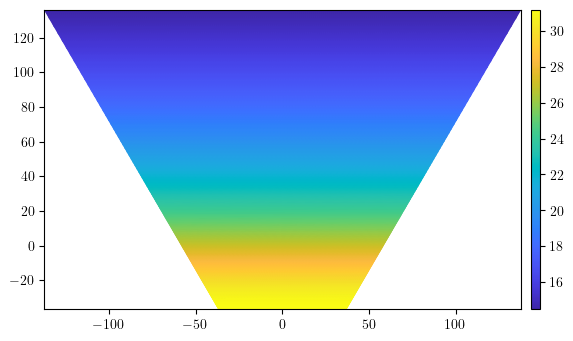

In [107]:
alpha = S['DRONE']['alpha_0']
h = S['DRONE']['h_drone']
f = S['DRONE']['focale']
Y = S['Y']
X = S['X']

z_star = dp.get_zstar(h,alpha,Y)

coeff = (np.cos(alpha) + (np.sin(alpha)**2)*Y/z_star)*f/z_star

fig, ax = plt.subplots()
imsh = ax.pcolormesh(S['X'],S['Y'],coeff,shading = 'gouraud',cmap = parula_map)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = plt.colorbar(imsh,cax = cax)
ax.set_aspect(1)


### Try inversion of $u_z$

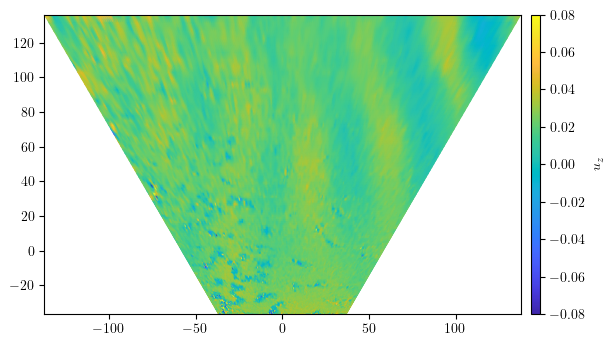

In [121]:
frame = 1
uz = Vy/coeff[:,:,None]

uz_values = np.array([-0.08,0.08])
fig, ax = plt.subplots()
imsh = ax.pcolormesh(S['X'],S['Y'],uz[:,:,frame],shading = 'gouraud',cmap = parula_map,
                    vmin = uz_values[0],vmax = uz_values[1])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = plt.colorbar(imsh,cax = cax)
cbar.set_label(r'$u_z$')
ax.set_aspect(1)

In [122]:
uz.shape

(239, 134, 5326)

### Deduce $u_x$

In [123]:
z_star.shape

(239, 134)

ValueError: For X (134) and Y (239) with gouraud shading, A should have shape (239, 134, 3) or (239, 134, 4) or (239, 134) or (32026,), not (239, 134, 5326)

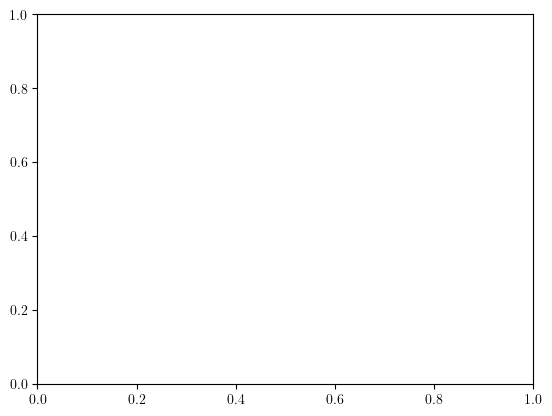

In [124]:
ux = Vx*z_star[:,:,None]/f - uz*np.sin(alpha)*X[:,:,None]/z_star[:,:,None] 

fig, ax = plt.subplots()
imsh = ax.pcolormesh(S['X'],S['Y'],ux[:,:,frame],shading = 'gouraud',cmap = parula_map)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = plt.colorbar(imsh,cax = cax)
cbar.set_label(r'$u_x$')
ax.set_aspect(1)

## Try to get spatial characteristics of apparent field $V_y$

### Interpolate field $V_y$ of a regular grid

In [118]:
#%% Define grid 

minx = -80
maxx = 80
miny = 20
maxy = 110

artificial_facq_x = 1/0.4 # artificial spatial frequency in box/meter
grid_x, grid_y = np.meshgrid(
    np.linspace(minx, maxx, int((maxx - minx)*artificial_facq_x)),  
    np.linspace(miny, maxy, int((maxy - miny)*artificial_facq_x))
)

### Compare spatial sampling 

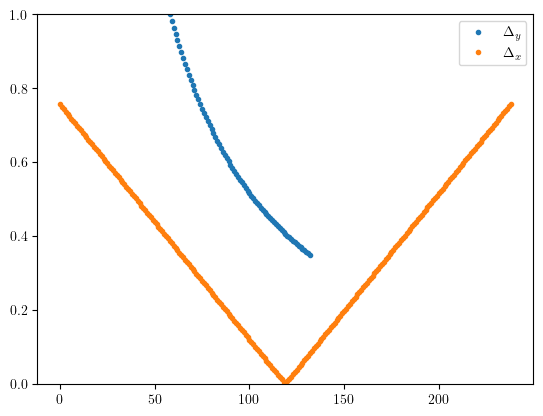

In [114]:
diff_y = np.diff(S['Y'][0,:])
diff_x = np.mean(np.diff(S['X'],axis = 1),axis = 1)


fig, ax = plt.subplots()
ax.plot(abs(diff_y),'.',label = '$\Delta_y$')
ax.plot(abs(diff_x),'.', label = '$\Delta_x$')
ax.set_ylim([0,1])
ax.legend()

### Interpolate field over a regular grid

In [119]:
frame = 3600
points = np.array([S['X'].ravel(),S['Y'].ravel()]).T
interp_Vy = dp.interpolate_field(points,ux [:,:,frame],grid_x,grid_y) 

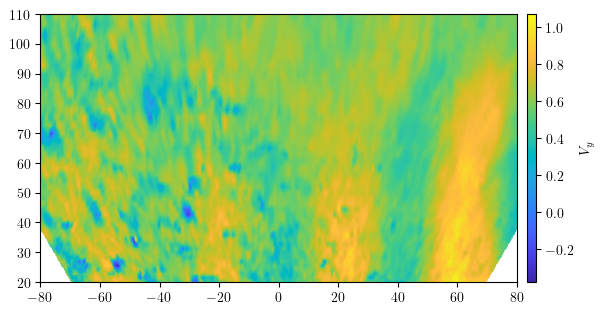

In [125]:
fig, ax = plt.subplots()
imsh = ax.pcolormesh(grid_x.T,grid_y.T,interp_Vy.T,shading = 'gouraud',cmap = parula_map)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = plt.colorbar(imsh,cax = cax)
cbar.set_label(r'$V_y$')
ax.set_aspect(1)

(-40.0, 30.0)

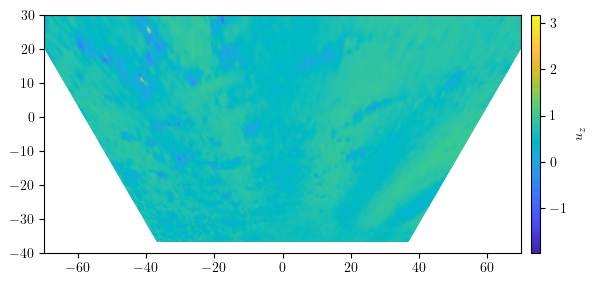

In [59]:
# mask_x = np.logical_and(S['X'] > minx, S['X'] < maxx)
# mask_y = np.logical_and(S['Y'] > miny, S['Y'] < maxy)

# X = S['X'][
frame = 3600
fig, ax = plt.subplots()
imsh = ax.pcolormesh(S['X'],S['Y'],Vy[:,:,frame],shading = 'gouraud',cmap = parula_map)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
cbar = plt.colorbar(imsh,cax = cax)
cbar.set_label(r'$u_z$')
ax.set_aspect(1)

ax.set_xlim([minx,maxx])
ax.set_ylim([miny,maxy])

In [46]:
S['DRONE']['alpha_0']*180/np.pi


34.3